# Graphs plotting for analysis of trending artist

Importing required libraries

In [4]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import datetime
import random
from pymongo import MongoClient
from urllib.parse import urlparse
from tabulate import tabulate
import requests
import pandas as pd

Connecting with Database

In [5]:
conn = MongoClient('mongodb://localhost:27017')

db = conn.database
collection1 = db.Twitter_Spot_26Nov
collection2 = db.Twitter_Spot_26Nov1
collection3 =  db.Twitter_Spot_27Nov
Collection4 = db.Twitter_Spot_27Nov1

Initializing the varibale and required array

In [6]:
count_Tracks = 0
count_Playlists = 0
count_Artists = 0

artist_id = []
Final_artist_list = []
Url_array =[]

Looping through the collection for fetching the data

In [ ]:
for x in collection1.find():
  pl = x['url']
  for l in pl:
    u = (l['expanded_url'])
    Url_array.append(u)

for x in collection2.find():
  pl = x['url']
  for l in pl:
    u = (l['expanded_url'])
    Url_array.append(u)

for x in collection3.find():
  pl = x['url']
  for l in pl:
    u = (l['expanded_url'])
    Url_array.append(u)

for x in Collection4.find():
  pl = x['url']
  for l in pl:
    u = (l['expanded_url'])
    Url_array.append(u)

Fetching the data relevalant for ploting 

In [ ]:
for u in Url_array:
    if "open.spotify.com/track" in u:
        parts = urlparse(u)
        directories = parts.path.strip('/').split('/')
        artist_id.append(directories[1])
        count_Tracks = count_Tracks + 1
        
        for i in artist_id:
            r = requests.get(BASE_URL + 'tracks/' + i, headers=headers)
            try:
                for post in r.json()['album']['artists']:
                    Final_artist_list.append(post['name'])
            except:
                pass
                
    if "open.spotify.com/playlist" in u:
        parts = urlparse(u)
        directories = parts.path.strip('/').split('/')
        artist_id.append(directories[1])
        count_Playlists = count_Playlists + 1
        
        for i in artist_id:
            r = requests.get(BASE_URL + 'playlists/' + i, headers=headers)
            try:
                list = r.json()['tracks']['items']
                for post in list:
                    singer = (post['track']['album']['artists'])
                    for post in singer:
                        Final_artist_list.append(post['name'])
            except:
                pass
            
    if "open.spotify.com/artist" in u:
        parts = urlparse(u)
        directories = parts.path.strip('/').split('/')
        artist_id.append(directories[1])
        count_Artists = count_Artists + 1
        
        for i in artist_id:
            r = requests.get(BASE_URL + 'artists/' + i, headers=headers)
            try:
                list = r.json()['name']
            except:
                pass

Retrieving data for plotting graphs

In [ ]:
dfa = pd.DataFrame(Final_artist_list,columns= ['Artists'])
Artist_count = dfa.pivot_table(columns=['Artists'], aggfunc='size')
dfa = Artist_count.reset_index()
dfa.columns = ['Artists','Twitter Tweets']
dfa = dfa.sort_values(by=['Twitter Tweets'], ascending=False)
dfa = dfa.head(10)
print(tabulate(dfa, headers='keys', tablefmt='psql'))

print("Number of playlist : ", count_Playlists)
print("Number of tracks : ", count_Tracks)
print("Number of artists : ", count_Artists)

Tracks, Artists, Playlist on Twitter & Reddit analysis

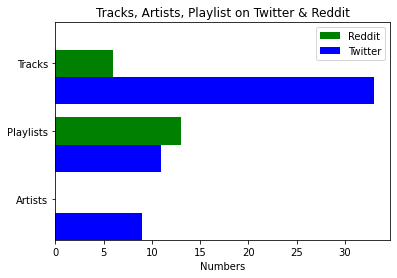

In [3]:
# df = pandas.DataFrame(dict(graph=['Tracks', 'Playlists','Artists'],
#                             n=[33,11, 9],m=[6,13, 0])) 
df = pandas.DataFrame(dict(graph=['Artists','Playlists','Tracks'],
                            n=[count_Playlists,count_Tracks,count_Artists],m=[count_Playlists,count_Tracks,count_Artists])) 
ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots()

ax.barh(ind + width, df.m, width, color='green', label='Reddit')
ax.barh(ind, df.n, width, color='blue', label='Twitter')



ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
plt.xlabel("Numbers")
plt.title("Tracks, Artists, Playlist on Twitter & Reddit")
ax.legend()

plt.show()

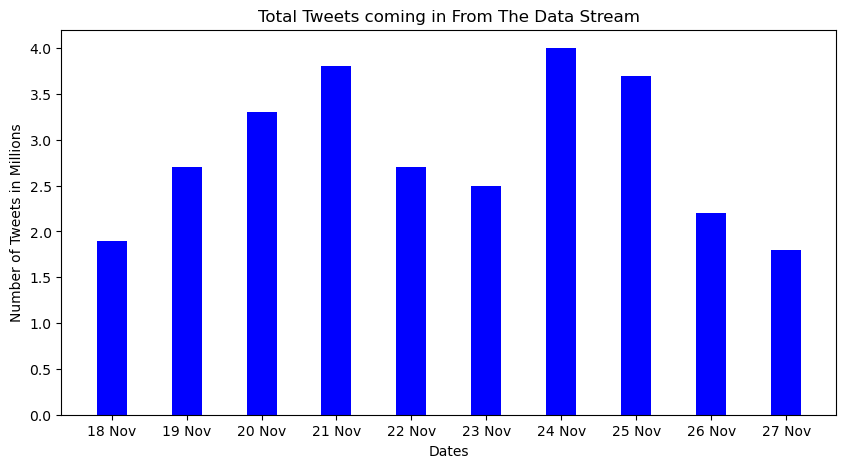

In [28]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'18 Nov':count_Playlists, '19 Nov':count_Tracks, '20 Nov':count_Tracks,
        '21 Nov':count_Playlists, '22 Nov':count_Tracks, '23 Nov':count_Playlists, '24 Nov':count_Tracks, '25 Nov':count_Playlists, '26 Nov':count_Playlists, '27 Nov':count_Tracks}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Dates")
plt.ylabel("Number of Tweets in Millions")
plt.title("Total Tweets coming in From The Data Stream")
plt.show()

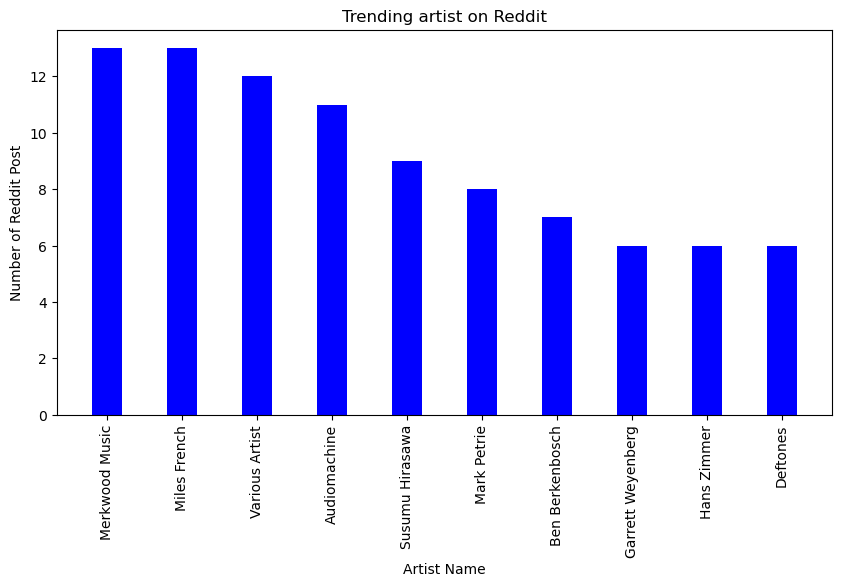

In [37]:

# creating the dataset
data = {'Merkwood Music':count_Artists, 'Miles French':count_Artists, 'Various Artist':count_Artists, 'Audiomachine':count_Artists, 'Susumu Hirasawa':count_Artists, 'Mark Petrie':count_Artists, 'Ben Berkenbosch':count_Artists, 'Garrett Weyenberg':count_Artists, 'Hans Zimmer':count_Artists, 'Deftones':count_Artists}
Artist_Name = list(data.keys())
Post = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Artist_Name, Post, color ='blue',width = 0.4)

plt.xticks(rotation=90)
 
plt.xlabel("Artist Name")
plt.ylabel("Number of Reddit Post")
plt.title("Trending artist on Reddit")

plt.show()

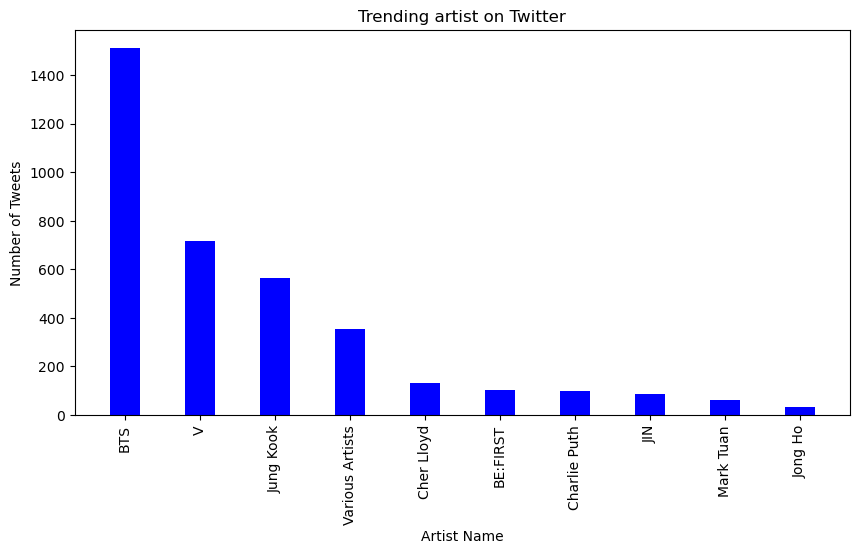

In [35]:
 
# creating the dataset
data = {'BTS':count_Artists, 'V':count_Artists, 'Jung Kook':count_Artists, 'Various Artists':count_Artists, 'Cher Lloyd':count_Artists, 'BE:FIRST':count_Artists, 'Charlie Puth':count_Artists, 'JIN':count_Artists, 'Mark Tuan':count_Artists, 'Jong Ho':count_Artists}
Artist_Name = list(data.keys())
Post = list(data.values())
  
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(Artist_Name, Post, color ='blue',width = 0.4)

plt.xticks(rotation=90)
 
plt.xlabel("Artist Name")
plt.ylabel("Number of Tweets")
plt.title("Trending artist on Twitter")

plt.show()

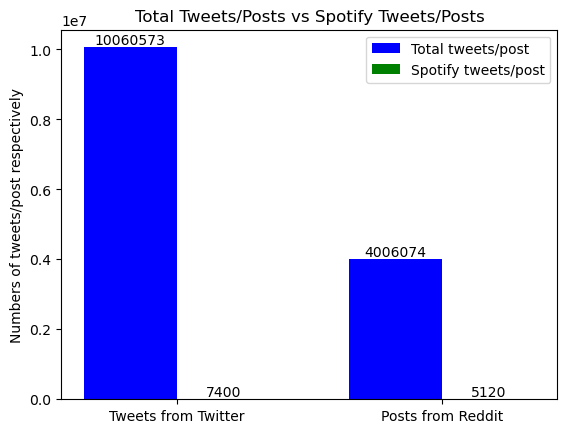

In [34]:
N = 2
Total = (Twitter_data, Reddit_data)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Total, width, color='b')
spotify = (Twitter_Spot_data, Reddit_Spot_data)
rects2 = ax.bar(ind + width, spotify, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Numbers of tweets/post respectively')
ax.set_title('Total Tweets/Posts vs Spotify Tweets/Posts')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Tweets from Twitter', 'Posts from Reddit'))
ax.legend((rects1[0], rects2[0]), ('Total tweets/post', 'Spotify tweets/post'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()            
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % float(height),ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

plt.show()

Tweets n Spotify vs tracks related tweets

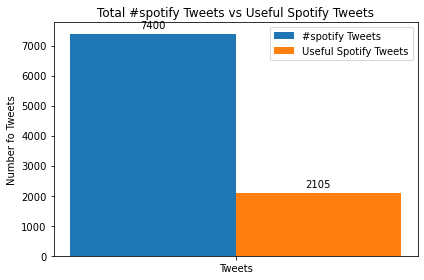

In [7]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Tweets']
total = [Total_Spotify_Data]
useful = [Total_Spotify _Useful_Data]

x = np.arange(len(labels))  
width = 1 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total, width, label='#spotify Tweets')
rects2 = ax.bar(x + width/2, useful, width, label='Useful Spotify Tweets')

ax.set_ylabel('Number fo Tweets')
ax.set_title('Total #spotify Tweets vs Useful Spotify Tweets')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# Politics analysis from date 4th Nov to 14th Nov 2022

In [ ]:
import datetime as dt                                       #Importing library for date management
import pandas as pd                                         #Importing library for data manipulation in python
import matplotlib.pyplot as plt                             #Importing library for creating interactive visualizations in Python
from pprint import pprint                                   #Importing for displaying lists in the "pretty" way (Not required)

pd.set_option("display.max_columns", None)                  #Configuration for pandas to show all columns on dataframe

"""
BEGIN - DATAFRAME GENERATION FUNCTIONS
"""

"""FOR POSTS"""
def data_prep_posts(subreddit, start_time, end_time, filters, limit):
    if(len(filters) == 0):
        filters = ['id', 'author', 'created_utc',
                   'domain', 'url',
                   'title', 'num_comments']                 #We set by default some columns that will be useful for data analysis

    posts = list(api.search_submissions(
        subreddit=subreddit,                                #We set the subreddit we want to audit
        after=start_time,                                   #Start date
        before=end_time,                                    #End date
        filter=filters,                                     #Column names we want to get from reddit
        limit=limit))                                       #Max number of posts we wanto to recieve

    return pd.DataFrame(posts)                              #Return dataframe for analysis


"""FOR COMMENTS"""
def data_prep_comments(term, start_time, end_time, filters, limit):
    if (len(filters) == 0):
        filters = ['id', 'author', 'created_utc',
                   'body', 'permalink', 'subreddit']        #We set by default some columns that will be useful for data analysis

    comments = list(api.search_comments(
        q=term,                                             #We set the subreddit we want to audit
        after=start_time,                                   #Start date
        before=end_time,                                    #End date
        filter=filters,                                     #Column names we want to get from reddit
        limit=limit))                                       #Max number of comments we wanto to recieve
    return pd.DataFrame(comments)                           #Return dataframe for analysis


"""
BEGIN - FUNCTIONS
"""
###Function to plot the number of posts per day on the specified subreddit
def count_posts_per_date(df_p, title, xlabel, ylabel):
    df_p.groupby([df_p.datetime.dt.date]).count().plot(y='id', rot=45, kind='bar', label='Posts')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

###Function to plot the mean of comments per day on the specified subreddit
def mean_comments_per_date(df_p, title, xlabel, ylabel):
    df_p.groupby([df_p.datetime.dt.date]).mean().plot(y='num_comments', rot=45, kind='line', label='Comments')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

"""
END - FUNCTIONS
"""


def main():
    subreddit = "politics"                           #Name of the subreddit we are auditing
    start_time = int(dt.datetime(2022, 4, 11).timestamp())  #We define the starting date for our search
    end_time = int(dt.datetime(2021, 14, 11).timestamp())   #We define the ending date for our search
    filters = []                                           #We don´t want specific filters
    limit = 1000                                           #Number of elements we want to recieve

    """Here we are going to get subreddits for a brief analysis"""
    df_p = data_prep_posts(subreddit,start_time,
                         end_time,filters,limit)           #Call function for dataframe creation of comments

    df_p['datetime'] = df_p['created_utc'].map(
        lambda t: dt.datetime.fromtimestamp(t))
    df_p = df_p.drop('created_utc', axis=1)                #Drop the column on timestamp format
    df_p = df_p.sort_values(by='datetime')                 #Sort the Row by datetime
    df_p["datetime"] = pd.to_datetime(df_p["datetime"])    #Convert timestamp format to datetime for data analysis


    df_p.to_csv(f'dataset_{subreddit}_posts.csv', sep=',', # Save the dataset on a csv file for future analysis
                header=True, index=False, columns=[
            'id', 'author', 'datetime', 'domain',
            'url', 'title', 'num_comments'
        ])

    count_posts_per_date(df_p, 'Post per day', 'Days',     #Function to plot the number of posts per day on the specified subreddit
                         'posts')
    mean_comments_per_date(df_p,                           #Function to plot the mean of comments per day on the specified subreddit
                           'Average comments per day',
                           'Days', 'comments')

    """Here we are going to get comments for a brief analysis"""
    term = 'election'                                        #Term we want to search for
    limit = 10                                              #Number of elelemts we want to recieve
    df_c = data_prep_comments(term, start_time,             #Call function for dataframe creation of comments
                         end_time, filters, limit)

if __name__== "__main__" : main()